In [14]:
import math
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import img_as_float
from tqdm import tqdm_notebook as tqdm
from sklearn.cluster import KMeans

1) Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

In [3]:
image = imread(r'/Users/u17491440/PycharmProjects/enterInML/data/week_6/parrots.jpeg')
image = img_as_float(image)
image

array([[[0.01568627, 0.49411765, 0.01960784],
        [0.00784314, 0.49411765, 0.00784314],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21960784, 0.00784314],
        [0.        , 0.20784314, 0.03137255],
        [0.00784314, 0.21568627, 0.04313725]],

       [[0.01568627, 0.49411765, 0.01960784],
        [0.00784314, 0.49411765, 0.00784314],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21176471, 0.00392157],
        [0.        , 0.20784314, 0.03137255],
        [0.        , 0.20392157, 0.03137255]],

       [[0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21176471, 0.00392157],
        [0.        , 0.20392157, 0.03137255],
        [0.        , 0.2       , 0.03137255]],

       ...,

       [[0.4745098 , 0.37647059, 0.01568627],
        [0.44705882, 0.35686275, 0.        ],
        [0.45098039, 0

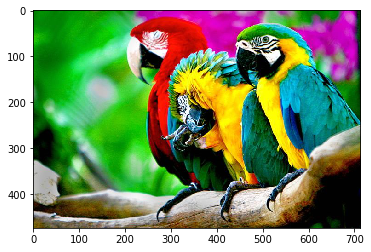

In [6]:
# Обработка и прихранивание данных
image = imread(r'/Users/u17491440/PycharmProjects/enterInML/data/week_6/parrots.jpeg')
image = img_as_float(image)
data = pd.DataFrame(columns =[ 'x', 'y','R', 'G', 'B'])
index = 0
for i in tqdm(range(0,image.shape[0],1)):
    for j in range(0,image.shape[1],1):
        a,b,c = image[i][j]
        data.loc[index] = i,j,a,b,c  
        index +=1
    data.to_csv(r'/Users/u17491440/PycharmProjects/enterInML/data/week_6/Result.txt', sep = ' ', header = False, index = False, mode ='a+') 
    data = pd.DataFrame(columns =[ 'x', 'y','R', 'G', 'B'])
plt.imshow(image)

2) Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

In [7]:
m = image.shape[0]
n = image.shape[1]  

3) Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

In [12]:
data = pd.read_csv(r'/Users/u17491440/PycharmProjects/enterInML/data/week_6/Result.txt', names = [ 'x', 'y','R', 'G', 'B'], delim_whitespace = True)
m = image.shape[0]
n = image.shape[1]  
kmeans = KMeans(n_clusters = 11, random_state=241,init='k-means++').fit(data[['R', 'G', 'B']])
data['label'] = kmeans.labels_
data['mid_R'] = 0
data['mid_G'] = 0
data['mid_G'] = 0

data['med_R'] = 0
data['med_G'] = 0
data['med_G'] = 0

mid_col = pd.DataFrame(columns = ['R','G','B'])
med_col = pd.DataFrame(columns = ['R','G','B'])

4) Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно (см. определение).

5) Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.

In [15]:
for i in tqdm(range(kmeans.labels_.min(),kmeans.labels_.max()+1,1)):
    mid_col.loc[i,'R'] = data[data['label'] == i]['R'].mean()
    mid_col.loc[i,'G'] = data[data['label'] == i]['G'].mean()
    mid_col.loc[i,'B'] = data[data['label'] == i]['B'].mean()
    
    med_col.loc[i,'R'] = data[data['label'] == i]['R'].median()
    med_col.loc[i,'G'] = data[data['label'] == i]['G'].median()
    med_col.loc[i,'B'] = data[data['label'] == i]['B'].median()
    
for i in tqdm(range(kmeans.labels_.min(),kmeans.labels_.max()+1,1)):
    data.loc[data['label'] == i,'mid_R'] = mid_col['R'][i]
    data.loc[data['label'] == i,'mid_G'] = mid_col['G'][i]
    data.loc[data['label'] == i,'mid_B'] = mid_col['B'][i]
    
    data.loc[data['label'] == i,'med_R'] = med_col['R'][i]
    data.loc[data['label'] == i,'med_G'] = med_col['G'][i]
    data.loc[data['label'] == i,'med_B'] = med_col['B'][i]
    
# Рассчет качества    
R = sum( (data['R'] - data['mid_R'])**2 )
G = sum( (data['G'] - data['mid_G'])**2 )
B = sum( (data['B'] - data['mid_B'])**2 )
mse = (1/(3*m*n))*(R+G+B)
psnr = 20* math.log10(1/math.sqrt(mse))
print(psnr, ' Для среднего')

R = sum( (data['R'] - data['med_R'])**2 )
G = sum( (data['G'] - data['med_G'])**2 )
B = sum( (data['B'] - data['med_B'])**2 )
mse = (1/(3*m*n))*(R+G+B)
psnr = 20* math.log10(1/math.sqrt(mse))
print(psnr, ' Для медианного значения')


20.127588746515936  Для среднего
19.841284073896496  Для медианного значения


Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров).

11